Steel plate faults with `GridSearchCV` and feature importances.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Imports

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import pandas as pd

from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Load data

In [4]:
df = pd.read_csv('../data/steel_plates_faults.csv')

df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Fault
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


In [5]:
feature_names = list(
    sorted(
        set(df.columns) - set(['Fault'])
    )
)

feature_names

['Edges_Index',
 'Edges_X_Index',
 'Edges_Y_Index',
 'Empty_Index',
 'Length_of_Conveyer',
 'LogOfAreas',
 'Log_X_Index',
 'Log_Y_Index',
 'Luminosity_Index',
 'Maximum_of_Luminosity',
 'Minimum_of_Luminosity',
 'Orientation_Index',
 'Outside_Global_Index',
 'Outside_X_Index',
 'Pixels_Areas',
 'SigmoidOfAreas',
 'Square_Index',
 'Steel_Plate_Thickness',
 'Sum_of_Luminosity',
 'TypeOfSteel_A300',
 'TypeOfSteel_A400',
 'X_Maximum',
 'X_Minimum',
 'X_Perimeter',
 'Y_Maximum',
 'Y_Minimum',
 'Y_Perimeter']

In [6]:
X = df[feature_names]
y = df['Fault']

X

,Edges_Index,Edges_X_Index,Edges_Y_Index,Empty_Index,Length_of_Conveyer,LogOfAreas,Log_X_Index,Log_Y_Index,Luminosity_Index,Maximum_of_Luminosity,...,Steel_Plate_Thickness,Sum_of_Luminosity,TypeOfSteel_A300,TypeOfSteel_A400,X_Maximum,X_Minimum,X_Perimeter,Y_Maximum,Y_Minimum,Y_Perimeter
0,0.0498,0.4706,1.0000,0.2415,1687,2.4265,0.9031,1.6435,-0.2913,108,...,80,24220,True,False,50,42,17,270944,270900,44
1,0.7647,0.6000,0.9667,0.3793,1687,2.0334,0.7782,1.4624,-0.1756,123,...,80,11397,True,False,651,645,10,2538108,2538079,30
2,0.9710,0.7500,0.9474,0.3426,1623,1.8513,0.7782,1.2553,-0.1228,125,...,100,7972,True,False,835,829,8,1553931,1553913,19
3,0.7287,0.5385,1.0000,0.4413,1353,2.2455,0.8451,1.6532,-0.1568,126,...,290,18996,False,True,860,853,13,369415,369370,45
4,0.0695,0.2833,0.9885,0.4486,1353,3.3818,1.2305,2.4099,-0.1992,126,...,185,246930,False,True,1306,1289,60,498335,498078,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,0.3662,0.5185,0.7273,0.3906,1360,2.4362,1.4472,1.2041,0.0026,141,...,40,35033,False,True,277,249,54,325796,325780,22
1937,0.2118,0.7046,0.7083,0.4554,1360,2.4579,1.4914,1.2305,-0.0582,133,...,40,34599,False,True,175,144,44,340598,340581,24
1938,0.2132,0.7250,0.6818,0.3287,1360,2.4654,1.4624,1.1761,0.0052,140,...,40,37572,False,True,174,145,40,386794,386779,22
1939,0.2015,0.3402,0.6596,0.5904,1360,2.6222,1.5185,1.4914,-0.0171,140,...,40,52715,False,True,170,137,97,422528,422497,47


In [7]:
for f_name in feature_names:
    
    if df[f_name].dtype == bool:
        print(f_name)

TypeOfSteel_A300
TypeOfSteel_A400


In [8]:
df[['TypeOfSteel_A300', 'TypeOfSteel_A400']]

,TypeOfSteel_A300,TypeOfSteel_A400
0,True,False
1,True,False
2,True,False
3,False,True
4,False,True
...,...,...
1936,False,True
1937,False,True
1938,False,True
1939,False,True


In [9]:
np.all(df['TypeOfSteel_A300'] == (~df['TypeOfSteel_A400']))

True

In [10]:
scaler = StandardScaler()
_ = scaler.fit(X)

In [11]:
X_scaled = scaler.transform(X)

## Split data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [13]:
X_train.shape

(1455, 27)

In [14]:
X_test.shape

(486, 27)

## Grid search with cross validation

In [15]:
gs = GridSearchCV(
    estimator=RandomForestClassifier(random_state=24),
    param_grid={
        'n_estimators': [5, 10, 20], 
        'min_samples_split': (2, 4, 8, 16, 32),
        'min_samples_leaf': (1, 2, 4, 8),
        'criterion': ['gini', 'entropy'],
    },
    scoring='accuracy',
    cv=4,
)

gs.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=24),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': (1, 2, 4, 8),
                         'min_samples_split': (2, 4, 8, 16, 32),
                         'n_estimators': [5, 10, 20]},
             scoring='accuracy')

In [16]:
gs.cv_results_['mean_test_score']

array([0.69829035, 0.72715353, 0.75670352, 0.7071981 , 0.73263668,
       0.74433332, 0.69004291, 0.72851769, 0.73608021, 0.70859444,
       0.73126495, 0.73952752, 0.70446977, 0.71614938, 0.7285158 ,
       0.70652643, 0.72783845, 0.73608778, 0.70652643, 0.72783845,
       0.73608778, 0.71889096, 0.73952373, 0.75120523, 0.70377728,
       0.73471037, 0.74707489, 0.69279206, 0.70447166, 0.71820982,
       0.7106492 , 0.71683052, 0.73263101, 0.7106492 , 0.71683052,
       0.73263101, 0.7106492 , 0.71683052, 0.73263101, 0.70377161,
       0.72235151, 0.73331971, 0.70102814, 0.71340024, 0.71752301,
       0.69964694, 0.71683809, 0.73126684, 0.69964694, 0.71683809,
       0.73126684, 0.69964694, 0.71683809, 0.73126684, 0.69964694,
       0.71683809, 0.73126684, 0.69140329, 0.71407948, 0.72026269,
       0.71889474, 0.74639187, 0.76081116, 0.72714028, 0.75189205,
       0.76426604, 0.72646104, 0.75395816, 0.76702653, 0.71408705,
       0.74570127, 0.74296348, 0.70239798, 0.71131898, 0.72782

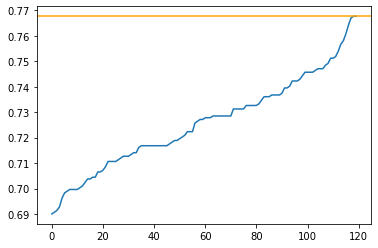

In [17]:
_ = plt.plot(sorted(gs.cv_results_['mean_test_score']))

_ = plt.axhline(gs.best_score_, color='orange')

In [18]:
gs.best_score_

0.7676925347379894

In [19]:
gs.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 20}

In [20]:
estimator = RandomForestClassifier(random_state=24, **gs.best_params_)

estimator.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2, n_estimators=20,
                       random_state=24)

In [21]:
y_pred = estimator.predict(X_test)
acc = accuracy_score(y_test, y_pred)

acc

0.7716049382716049

In [22]:
estimator.feature_importances_

array([0.02757261, 0.01866778, 0.02483011, 0.01722831, 0.0805418 ,
       0.04808961, 0.03311341, 0.01826012, 0.02613317, 0.02557316,
       0.03616448, 0.05144733, 0.00327409, 0.06389509, 0.05255297,
       0.02414964, 0.03485641, 0.07385663, 0.05500531, 0.02933476,
       0.03059538, 0.03863357, 0.04077735, 0.04389852, 0.03094721,
       0.03567584, 0.03492533])

In [23]:
importances = []

for i, feature_name in enumerate(X.columns):
    
    imp = estimator.feature_importances_[i]
    
    entry = (feature_name, imp)
    importances.append(entry)
    

pd.DataFrame(importances, columns=['feature_name', 'importance']) \
    .sort_values(by='importance', ascending=False).set_index('feature_name')

,importance
feature_name,
Length_of_Conveyer,0.080542
Steel_Plate_Thickness,0.073857
Outside_X_Index,0.063895
Sum_of_Luminosity,0.055005
Pixels_Areas,0.052553
Orientation_Index,0.051447
LogOfAreas,0.048090
X_Perimeter,0.043899
X_Minimum,0.040777
